In [1]:
!pip install psycopg2 sqlalchemy python-dotenv pandas

In [2]:
import os
from dotenv import load_dotenv
import psycopg2
from sqlalchemy import create_engine
import pandas as pd

In [3]:
csv_folder = './hr_dataset_updated'

# List of CSV files
csv_files = [
    "department.csv ",
    "job_history.csv",
    "department_manager_history.csv",
    "employee.csv",
    "location.csv",
    "positions.csv",
    "salary.csv"    
]

for file in csv_files:
    file_path = os.path.join(csv_folder, file)
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        
        # Drop duplicates
        df_cleaned = df.drop_duplicates()
        
        # Overwrite the original file
        df_cleaned.to_csv(file_path, index=False)
        
        print(f"✅ Cleaned and overwritten: {file_path}")
    else:
        print(f"❌ File not found: {file_path}")

print("🚀 All CSVs cleaned and updated successfully!")


✅ Cleaned and overwritten: ./hr_dataset_updated\department.csv 
✅ Cleaned and overwritten: ./hr_dataset_updated\job_history.csv
✅ Cleaned and overwritten: ./hr_dataset_updated\department_manager_history.csv
✅ Cleaned and overwritten: ./hr_dataset_updated\employee.csv
✅ Cleaned and overwritten: ./hr_dataset_updated\location.csv
✅ Cleaned and overwritten: ./hr_dataset_updated\positions.csv
✅ Cleaned and overwritten: ./hr_dataset_updated\salary.csv
🚀 All CSVs cleaned and updated successfully!


In [4]:
for file in csv_files:
    file_path = os.path.join(csv_folder, file)
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        # Check nulls
        null_counts = df.isnull().sum()

        print(f"\n📄 {file}")
        print(null_counts)
    else:
        print(f"❌ File not found: {file_path}")


📄 department.csv 
department_id         0
department_name       0
current_manager_id    0
location_id           0
dtype: int64

📄 job_history.csv
job_history_id    0
employee_id       0
start_date        0
end_date          0
all_jobs_id       0
dtype: int64

📄 department_manager_history.csv
manager_id       0
employee_id      0
department_id    0
start_date       0
end_date         0
dtype: int64

📄 employee.csv
employee_id      0
first_name       0
last_name        0
email            0
phone_number     0
hire_date        0
department_id    0
dtype: int64

📄 location.csv
location_id    0
city           0
state          0
country        0
region         0
dtype: int64

📄 positions.csv
all_jobs_id    0
job_title      0
min_salary     0
max_salary     0
dtype: int64

📄 salary.csv
salary_id      0
employee_id    0
salary         0
start_date     0
end_date       0
dtype: int64


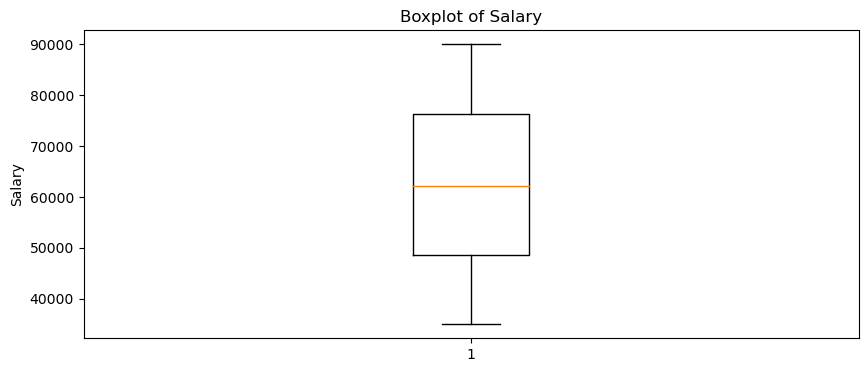

In [5]:
import matplotlib.pyplot as plt
df = pd.read_csv("hr_dataset_updated/salary.csv")
plt.figure(figsize=(10, 4))
plt.boxplot(df['salary'])
plt.title("Boxplot of Salary")
plt.ylabel("Salary")
plt.show()

In [7]:
import os
import pandas as pd
from sqlalchemy import create_engine
import psycopg2

# Folder containing CSVs
csv_folder = './hr_dataset_updated'

# List of CSV files (fixed: no trailing spaces)
csv_files = [
    "department.csv",
    "job_history.csv",
    "department_manager_history.csv",
    "employee.csv",
    "location.csv",
    "positions.csv",
    "salary.csv"
]

# Database connection details
db_user = 'postgres'
db_password = 'example'
db_host = 'localhost'
db_port = '5432'
db_name = 'postgres'

# Connect to PostgreSQL
connection = psycopg2.connect(
    database=db_name,
    user=db_user,
    password=db_password,
    host=db_host,
    port=db_port
)

# SQLAlchemy engine
engine = create_engine(f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

def load_csv_to_postgresql(csv_file, table_name, conn, engine):
    try:
        df = pd.read_csv(csv_file)

        # Dynamically create the table with all TEXT columns
        columns = ', '.join([f'"{col}" TEXT' for col in df.columns])

        create_table_query = f"""
            CREATE TABLE IF NOT EXISTS "{table_name}" (
                {columns}
            );
        """

        print(f"Creating table '{table_name}' with query: {create_table_query}")

        with conn.cursor() as cursor:
            cursor.execute(create_table_query)
            conn.commit()

        # Load Data
        df.to_sql(table_name, engine, if_exists="replace", index=False, method='multi', chunksize=1000)
        print(f"✅ Data from {csv_file} loaded into '{table_name}' successfully.")

    except Exception as e:
        print(f"❌ Error loading {csv_file}: {e}")

# Start uploading
if not os.path.exists(csv_folder):
    print(f"❌ Directory {csv_folder} does not exist.")
else:
    for csv_file in csv_files:
        csv_file_path = os.path.join(csv_folder, csv_file.strip())  # strip spaces just in case
        table_name = os.path.splitext(csv_file)[0].lower()  # table names lowercase
        load_csv_to_postgresql(csv_file=csv_file_path, table_name=table_name, conn=connection, engine=engine)

if connection:
    connection.close()
    print("🔒 Database connection closed.")


Creating table 'department' with query: 
            CREATE TABLE IF NOT EXISTS "department" (
                "department_id" TEXT, "department_name" TEXT, "current_manager_id" TEXT, "location_id" TEXT
            );
        
✅ Data from ./hr_dataset_updated\department.csv loaded into 'department' successfully.
Creating table 'job_history' with query: 
            CREATE TABLE IF NOT EXISTS "job_history" (
                "job_history_id" TEXT, "employee_id" TEXT, "start_date" TEXT, "end_date" TEXT, "all_jobs_id" TEXT
            );
        
✅ Data from ./hr_dataset_updated\job_history.csv loaded into 'job_history' successfully.
Creating table 'department_manager_history' with query: 
            CREATE TABLE IF NOT EXISTS "department_manager_history" (
                "manager_id" TEXT, "employee_id" TEXT, "department_id" TEXT, "start_date" TEXT, "end_date" TEXT
            );
        
✅ Data from ./hr_dataset_updated\department_manager_history.csv loaded into 'department_manager_his